In [1]:
%run '~/git/Bibliotecas.ipynb'

In [2]:
chuvas_m_r_pa=pd.read_csv('~/git/Importacao-por-SH-e-Municipio/temp/chuvas_m_r_pa.csv')
chuvas_m_r_pa=chuvas_m_r_pa.sort_values('Estação')
chuvas_m_r_pa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 448296 entries, 448295 to 224147
Data columns (total 21 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   Estação                                                448296 non-null  object 
 1   ano                                                    448296 non-null  int64  
 2   mês                                                    448296 non-null  int64  
 3   dia                                                    448296 non-null  int64  
 4   hour                                                   448296 non-null  int64  
 5   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       446137 non-null  float64
 6   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  447520 non-null  float64
 7   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        447513 non-null  float64
 8   PRESSÃO ATMOSFERICA MIN. NA HORA A

In [3]:
chuvas_m_r_pa=chuvas_m_r_pa.iloc[:,:6]
chuvas_m_r_pa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 448296 entries, 448295 to 224147
Data columns (total 6 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Estação                           448296 non-null  object 
 1   ano                               448296 non-null  int64  
 2   mês                               448296 non-null  int64  
 3   dia                               448296 non-null  int64  
 4   hour                              448296 non-null  int64  
 5   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)  446137 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 23.9+ MB


In [4]:
chuvas_m_r_pa=chuvas_m_r_pa.rename(columns={'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)':'mm','Estação':'Município'})
chuvas_m_r_pa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 448296 entries, 448295 to 224147
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Município  448296 non-null  object 
 1   ano        448296 non-null  int64  
 2   mês        448296 non-null  int64  
 3   dia        448296 non-null  int64  
 4   hour       448296 non-null  int64  
 5   mm         446137 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 23.9+ MB


In [5]:
chuvas_m_r_pa.mm.sort_values().unique()

array([-9.999e+03,  0.000e+00,  2.000e-01,  4.000e-01,  6.000e-01,
        8.000e-01,  1.000e+00,  1.200e+00,  1.400e+00,  1.600e+00,
        1.800e+00,  2.000e+00,  2.200e+00,  2.400e+00,  2.600e+00,
        2.800e+00,  3.000e+00,  3.200e+00,  3.400e+00,  3.600e+00,
        3.800e+00,  4.000e+00,  4.200e+00,  4.400e+00,  4.600e+00,
        4.800e+00,  5.000e+00,  5.200e+00,  5.400e+00,  5.600e+00,
        5.800e+00,  6.000e+00,  6.200e+00,  6.400e+00,  6.600e+00,
        6.800e+00,  7.000e+00,  7.200e+00,  7.400e+00,  7.600e+00,
        7.800e+00,  8.000e+00,  8.200e+00,  8.400e+00,  8.600e+00,
        8.800e+00,  9.000e+00,  9.200e+00,  9.400e+00,  9.600e+00,
        9.800e+00,  1.000e+01,  1.020e+01,  1.040e+01,  1.060e+01,
        1.080e+01,  1.100e+01,  1.120e+01,  1.140e+01,  1.160e+01,
        1.180e+01,  1.200e+01,  1.220e+01,  1.240e+01,  1.260e+01,
        1.280e+01,  1.300e+01,  1.320e+01,  1.340e+01,  1.360e+01,
        1.380e+01,  1.400e+01,  1.420e+01,  1.440e+01,  1.460e

In [6]:
chuvas_m_r_pa.loc[chuvas_m_r_pa.mm==chuvas_m_r_pa.mm.min(),'mm']=np.nan
chuvas_m_r_pa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 448296 entries, 448295 to 224147
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Município  448296 non-null  object 
 1   ano        448296 non-null  int64  
 2   mês        448296 non-null  int64  
 3   dia        448296 non-null  int64  
 4   hour       448296 non-null  int64  
 5   mm         422781 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 23.9+ MB


In [7]:
chuvas_m_r_pa.mm.min()

0.0

In [8]:
chuvas_m_r_pa['date']=pd.to_datetime(chuvas_m_r_pa.ano.astype(str)+'/'+chuvas_m_r_pa.mês.astype(str)+'/1')

In [9]:
primeira_data=chuvas_m_r_pa.groupby('Município')[['date']].min().reset_index().date.max()
primeira_data

Timestamp('2007-05-01 00:00:00')

In [10]:
chuvas_m_r_pa=chuvas_m_r_pa[chuvas_m_r_pa.date>=primeira_data]

In [11]:
chuvas_m_r_pa[chuvas_m_r_pa.date==chuvas_m_r_pa.date.min()]

chuvas_m_r_pa=chuvas_m_r_pa.drop(columns='date')

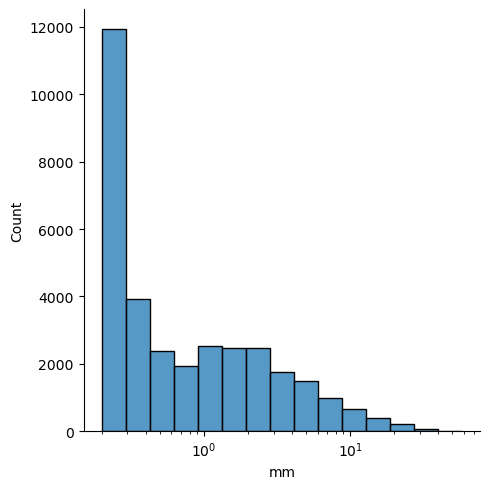

In [12]:
sns.displot(data=chuvas_m_r_pa[chuvas_m_r_pa.mm>0],x='mm',log_scale=True, bins=15)

In [13]:
chuvas_m_r_pa_isna=chuvas_m_r_pa[chuvas_m_r_pa.mm.isna()]
chuvas_m_r_pa_notna=chuvas_m_r_pa[~chuvas_m_r_pa.mm.isna()]

In [14]:
corr_1=chuvas_m_r_pa_notna.groupby(by=['ano','mês','dia','hour']).mm.median().reset_index()
corr_2=chuvas_m_r_pa_notna.groupby(by=['ano','mês','dia']).mm.median().reset_index()
corr_3=chuvas_m_r_pa_notna.groupby(by=['ano','mês']).mm.median().reset_index()


In [15]:
chuvas_m_r_pa_isna_corr_1=chuvas_m_r_pa_isna.drop(columns='mm').merge(corr_1,how='outer')
chuvas_m_r_pa_isna_corr_1=chuvas_m_r_pa_isna_corr_1[~chuvas_m_r_pa_isna_corr_1.Município.isna()]
chuvas_m_r_pa_isna_corr_1

,Município,ano,mês,dia,hour,mm
0,CALDAS,2014,9,20,13,0.0
1,CALDAS,2007,10,24,23,0.9
2,CALDAS,2007,10,25,0,0.8
3,CALDAS,2007,10,25,1,1.5
4,CALDAS,2007,10,25,2,7.6
...,...,...,...,...,...,...
25102,PASSA QUATRO,2008,2,20,6,0.0
25103,PASSA QUATRO,2008,2,20,5,0.0
25104,PASSA QUATRO,2008,2,20,4,0.0
25105,PASSA QUATRO,2008,2,20,3,0.0


In [16]:
len(chuvas_m_r_pa_isna_corr_1.dropna())

24911

In [17]:
len(chuvas_m_r_pa_isna)

25107

In [18]:
chuvas_m_r_pa_corr_1=chuvas_m_r_pa_isna_corr_1[~chuvas_m_r_pa_isna_corr_1.mm.isna()]
chuvas_m_r_pa_corr_1

,Município,ano,mês,dia,hour,mm
0,CALDAS,2014,9,20,13,0.0
1,CALDAS,2007,10,24,23,0.9
2,CALDAS,2007,10,25,0,0.8
3,CALDAS,2007,10,25,1,1.5
4,CALDAS,2007,10,25,2,7.6
...,...,...,...,...,...,...
25102,PASSA QUATRO,2008,2,20,6,0.0
25103,PASSA QUATRO,2008,2,20,5,0.0
25104,PASSA QUATRO,2008,2,20,4,0.0
25105,PASSA QUATRO,2008,2,20,3,0.0


In [19]:
chuvas_m_r_pa_isna_2=chuvas_m_r_pa_isna_corr_1[chuvas_m_r_pa_isna_corr_1.mm.isna()]
chuvas_m_r_pa_isna_2

,Município,ano,mês,dia,hour,mm
30,CALDAS,2007,7,28,7,NaN
31,CONCEICAO DAS ALAGOAS,2007,7,28,7,NaN
32,PASSA QUATRO,2007,7,28,7,NaN
35,CALDAS,2007,8,6,19,NaN
36,CONCEICAO DAS ALAGOAS,2007,8,6,19,NaN
...,...,...,...,...,...,...
4076,CONCEICAO DAS ALAGOAS,2009,10,7,6,NaN
4077,PASSA QUATRO,2009,10,7,6,NaN
4943,CALDAS,2018,2,7,17,NaN
4944,CONCEICAO DAS ALAGOAS,2018,2,7,17,NaN


In [20]:
chuvas_m_r_pa_isna_corr_2=chuvas_m_r_pa_isna_2.drop(columns='mm').merge(corr_2,how='outer')
chuvas_m_r_pa_isna_corr_2=chuvas_m_r_pa_isna_corr_2[~chuvas_m_r_pa_isna_corr_2.Município.isna()]
chuvas_m_r_pa_isna_corr_2

,Município,ano,mês,dia,hour,mm
0,CALDAS,2007,7,28,7.0,0.0
1,CONCEICAO DAS ALAGOAS,2007,7,28,7.0,0.0
2,PASSA QUATRO,2007,7,28,7.0,0.0
3,CALDAS,2007,8,6,19.0,0.0
4,CONCEICAO DAS ALAGOAS,2007,8,6,19.0,0.0
...,...,...,...,...,...,...
191,CONCEICAO DAS ALAGOAS,2009,10,7,6.0,0.0
192,PASSA QUATRO,2009,10,7,6.0,0.0
193,CALDAS,2018,2,7,17.0,0.0
194,CONCEICAO DAS ALAGOAS,2018,2,7,17.0,0.0


In [21]:
chuvas_m_r_pa_isna_2=chuvas_m_r_pa_isna.merge(corr_1,how='left')
chuvas_m_r_pa_isna_2.sort_values('mm')

,Município,ano,mês,dia,hour,mm
0,CALDAS,2014,9,20,13,NaN
1,CALDAS,2007,10,24,23,NaN
2,CALDAS,2007,10,25,0,NaN
3,CALDAS,2007,10,25,1,NaN
4,CALDAS,2007,10,25,2,NaN
...,...,...,...,...,...,...
25102,PASSA QUATRO,2008,2,20,6,NaN
25103,PASSA QUATRO,2008,2,20,5,NaN
25104,PASSA QUATRO,2008,2,20,4,NaN
25105,PASSA QUATRO,2008,2,20,3,NaN


In [22]:
len(chuvas_m_r_pa_isna_corr_2.dropna())

196

In [23]:
chuvas_m_r_pa_corr_2=chuvas_m_r_pa_isna_corr_2[~chuvas_m_r_pa_isna_corr_2.mm.isna()]
chuvas_m_r_pa_corr_2

,Município,ano,mês,dia,hour,mm
0,CALDAS,2007,7,28,7.0,0.0
1,CONCEICAO DAS ALAGOAS,2007,7,28,7.0,0.0
2,PASSA QUATRO,2007,7,28,7.0,0.0
3,CALDAS,2007,8,6,19.0,0.0
4,CONCEICAO DAS ALAGOAS,2007,8,6,19.0,0.0
...,...,...,...,...,...,...
191,CONCEICAO DAS ALAGOAS,2009,10,7,6.0,0.0
192,PASSA QUATRO,2009,10,7,6.0,0.0
193,CALDAS,2018,2,7,17.0,0.0
194,CONCEICAO DAS ALAGOAS,2018,2,7,17.0,0.0


In [24]:
chuvas_m_r_pa_isna_2=chuvas_m_r_pa_isna_corr_2[chuvas_m_r_pa_isna_corr_2.mm.isna()]
chuvas_m_r_pa_isna_2

,Município,ano,mês,dia,hour,mm


In [25]:
pd.concat([chuvas_m_r_pa_notna,chuvas_m_r_pa_corr_1,chuvas_m_r_pa_corr_2]).isna().sum()

Município    0
ano          0
mês          0
dia          0
hour         0
mm           0
dtype: int64

In [26]:
chuvas_m_r_pa_clean=pd.concat([chuvas_m_r_pa_notna,chuvas_m_r_pa_corr_1,chuvas_m_r_pa_corr_2])
chuvas_m_r_pa_clean.isna().sum()

Município    0
ano          0
mês          0
dia          0
hour         0
mm           0
dtype: int64

In [27]:
chuvas_m_r_pa_clean.iloc[:,:5].duplicated().sum()

0

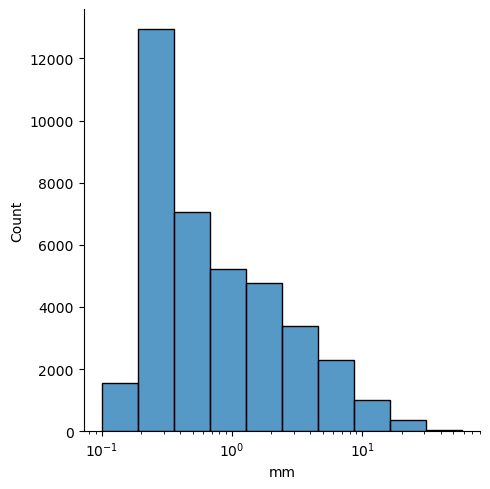

In [28]:
sns.displot(data=chuvas_m_r_pa_clean[chuvas_m_r_pa_clean.mm>0],x='mm',log_scale=True, bins=10)

Os dados não parecem normalmente distribuidos. Os demais dados meteorológicos poderão servir para identificar clusters de chuvas e auxiliar normalização. Porém isso não será feito agora.

Agrupando para igualar a unidade de tempo com os demais dados do projeto.

In [29]:
chuvas_m_r_pa_clean.head(1)

,Município,ano,mês,dia,hour,mm
448295,CALDAS,2019,12,31,23.0,0.0


In [30]:
chuvas_m_r_pa_clean=chuvas_m_r_pa_clean.groupby(by=chuvas_m_r_pa_clean.columns[:3].tolist())[chuvas_m_r_pa_clean.columns[5:].tolist()].sum().reset_index()
chuvas_m_r_pa_clean.head()

,Município,ano,mês,mm
0,CALDAS,2007,5,63.8
1,CALDAS,2007,6,14.2
2,CALDAS,2007,7,130.6
3,CALDAS,2007,8,0.4
4,CALDAS,2007,9,12.0


Obtendo a Matriz Esparsa

In [31]:
chuvas_m_r_pa_clean.head(1)

,Município,ano,mês,mm
0,CALDAS,2007,5,63.8


In [32]:
chuvas_m_r_pa_clean.iloc[:,:3]=chuvas_m_r_pa_clean.iloc[:,:3].astype('category')

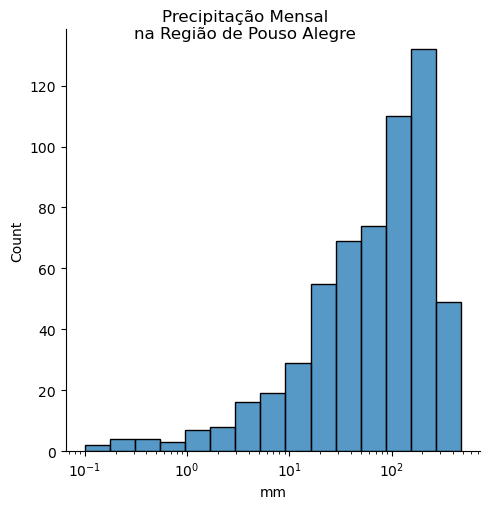

In [33]:
sns.displot(data=chuvas_m_r_pa_clean[chuvas_m_r_pa_clean.mm>0],x='mm',log_scale=True,bins=15).fig.suptitle('Precipitação Mensal\n\
na Região de Pouso Alegre',y=1.01)
plt.show()

A distribuição das chuvas foi considerada normal.

In [34]:
chuvas_m_r_pa_sprx=chuvas_m_r_pa_clean.groupby(by=chuvas_m_r_pa_clean.columns[:3].tolist())[chuvas_m_r_pa_clean.columns[3:].tolist()].sum().reset_index()
chuvas_m_r_pa_sprx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Município  612 non-null    object  
 1   ano        612 non-null    category
 2   mês        612 non-null    category
 3   mm         612 non-null    float64 
dtypes: category(2), float64(1), object(1)
memory usage: 11.9+ KB


In [35]:
chuvas_m_r_pa_sprx['date']=pd.to_datetime(chuvas_m_r_pa_sprx.ano.astype(str)+'/'+chuvas_m_r_pa_sprx.mês.astype(str)+'/1')

In [36]:
chuvas_m_r_pa_sprx=chuvas_m_r_pa_sprx[chuvas_m_r_pa_sprx.date>=primeira_data]

In [37]:
última_data=chuvas_m_r_pa_sprx.groupby('Município')[['date']].max().reset_index().date.min()
última_data

Timestamp('2023-12-01 00:00:00')

In [38]:
chuvas_m_r_pa_sprx=chuvas_m_r_pa_sprx[chuvas_m_r_pa_sprx.date<=última_data]

AttributeError: 'function' object has no attribute 'title'

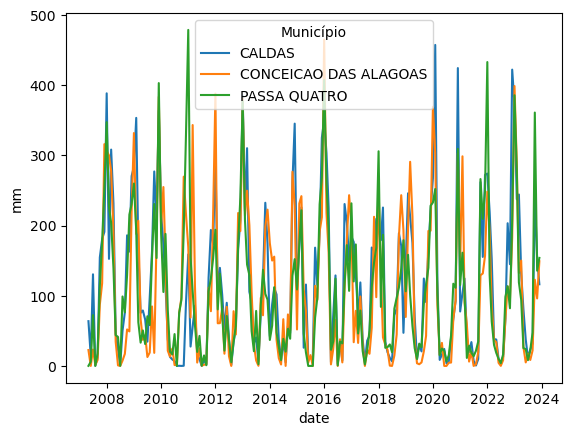

In [39]:
sns.lineplot(data=chuvas_m_r_pa_sprx,x='date',y='mm', hue='Município').set.title('x')

In [ ]:
chuvas_m_r_pa_sprx=chuvas_m_r_pa_sprx.drop(columns='date')
chuvas_m_r_pa_sprx

In [ ]:
chuvas_m_r_pa_sprx.to_csv('~/git/Importacao-por-SH-e-Municipio/temp/chuvas_m_r_pa_sprx.csv',index=False)

In [ ]:
chuvas_m_r_pa_sprx